<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project3/blob/main/EDA_Top_movie__genre__Imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Resume:**

In this notebook we perfomr the EDA to the following tables from IMDB:
- title.basics
- title.ratings
- title.akas

We did an analysis on what value to consider for the Top's.
We performed an analysis of the following KPI's:
- number of movies/year
- TOP genres and related number of movies produced
- TOP movies

**Before running this file, please run the script in Github folder Picklefix_Marta.ipynb.**


In [ ]:
#IMDB dataset - general info
# title.akas.tsv.gz - Contains the following information for titles:
# titleId (string) - a tconst, an alphanumeric unique identifier of the title
# ordering (integer) – a number to uniquely identify rows for a given titleId
# title (string) – the localized title
# region (string) - the region for this version of the title
# language (string) - the language of the title
# types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
# attributes (array) - Additional terms to describe this alternative title, not enumerated
# isOriginalTitle (boolean) – 0: not original title; 1: original title

# Marta
# title.basics.tsv.gz - Contains the following information for titles:
# tconst (string) - alphanumeric unique identifier of the title
# titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
# primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
# originalTitle (string) - original title, in the original language
# isAdult (boolean) - 0: non-adult title; 1: adult title
# startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
# endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
# runtimeMinutes – primary runtime of the title, in minutes
# genres (string array) – includes up to three genres associated with the title

# Marta
# title.crew.tsv.gz – Contains the director and writer information for all the titles in IMDb. Fields include:
# tconst (string) - alphanumeric unique identifier of the title
# directors (array of nconsts) - director(s) of the given title
# writers (array of nconsts) – writer(s) of the given title

# title.episode.tsv.gz – Contains the tv episode information. Fields include:
# tconst (string) - alphanumeric identifier of episode
# parentTconst (string) - alphanumeric identifier of the parent TV Series
# seasonNumber (integer) – season number the episode belongs to
# episodeNumber (integer) – episode number of the tconst in the TV series

# title.principals.tsv.gz – Contains the principal cast/crew for titles
# tconst (string) - alphanumeric unique identifier of the title
# ordering (integer) – a number to uniquely identify rows for a given titleId
# nconst (string) - alphanumeric unique identifier of the name/person
# category (string) - the category of job that person was in
# job (string) - the specific job title if applicable, else '\N'
# characters (string) - the name of the character played if applicable, else '\N'

#self-category: 
# Appear in titles with the genre Documentary
# Appear in titles with the keyword TV-special (e.g. the Academy Awards ceremony broadcast)
# Appear in titles with the keyword non-fiction (e.g. Talk-Shows)
# Are credited as "himself, herself, self, themselves" (e.g. in Making-of featurettes or Reality TV)
# are displayed in a separate section called "Self" and other roles will appear in their respective groupings.

# title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
# tconst (string) - alphanumeric unique identifier of the title
# averageRating – weighted average of all the individual user ratings
# numVotes - number of votes the title has received

# name.basics.tsv.gz – Contains the following information for names:
# nconst (string) - alphanumeric unique identifier of the name/person
# primaryName (string)– name by which the person is most often credited
# birthYear – in YYYY format
# deathYear – in YYYY format if applicable, else '\N'
# primaryProfession (array of strings)– the top-3 professions of the person
# knownForTitles (array of tconsts) – titles the person is known for

In [4]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
# import regex as re
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

# my_stopwords = nltk.corpus.stopwords.words('english')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd drive/MyDrive

/content/drive/MyDrive


In [7]:
#IMDB_title.basics
title_basics = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title_basics_p.pkl')
title_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9324309,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
9324310,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
9324311,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
9324312,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [ ]:
#IMDB_title.akas
title_akas = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title_akas_p.pickle')
title_akas

In [ ]:
#IMDB_title.crew
title_crew = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title_crew_p.pickle')
title_crew

In [8]:
#IMDB_title.ratings
title_ratings = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title_ratings_p.pickle')
title_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1920
1,tt0000002,5.8,260
2,tt0000003,6.5,1728
3,tt0000004,5.6,173
4,tt0000005,6.2,2541
...,...,...,...
1241069,tt9916690,7.4,6
1241070,tt9916720,5.3,270
1241071,tt9916730,9.0,6
1241072,tt9916766,6.7,21


In [ ]:
#Checks about tconts from title_basics in name_basics are ok
# condition = name_basics['tconst'] == 'tt0000001'
# condition.unique()

## Know the data

# M1) title_basics

In [ ]:
#Check the types of variables and null values
title_basics.info()

In [ ]:
# object ok = tconst, titleTyoe, primaryTitle, originalTitle

# isAdult: is bool, check if there are only 0 and 1

# runtimeMinutes : should be int

In [ ]:
#TODO=: convert runtimeminutes to int??
type(title_basics['runtimeMinutes'][0]) #-> str

In [ ]:
#check which variables the isAdult column has
title_basics['isAdult'].unique()

In [ ]:
#check which variables the isAdult column has and count them
title_basics['isAdult'].value_counts()

In [ ]:
#countercheck
condition = title_basics['isAdult'] == 2019
condition.unique()

In [ ]:
# go to imbd site and check what happens in theses tv episodes: 
condition = title_basics['isAdult'] == 2019
title_basics.loc[condition]

# Answer:
# it's the year when they aired the episode for 2020, 2019, 1981, 2017, 2014, 2005

In [ ]:
#check if other tv episodes show the date as start year or if they are //N 
condition = title_basics['titleType'] == 'tvEpisode'
title_basics.loc[condition]

title_basics['startYear'].loc[condition].value_counts()
#title_basics['endYear'].loc[condition].value_counts()

#The startyear column has 1105935 /N for the titletype = tv episodes
#The endyear column is empty for all the titletype = tv episodes


In [ ]:
#TODO replace the years checked in the startYear column

In [ ]:
condition = title_basics['isAdult'] == 0 | 1
title_basics.loc[condition]

In [ ]:
condition = title_basics['isAdult'] == '0'
title_basics.loc[condition]

In [ ]:
#check value_counts other columns
#total entries: 9301902

title_basics['tconst'].nunique()
#9301902

#Are there any /N values?
condition = title_basics['tconst'] == '/N'
condition.apply(lambda x : '1' if x == 1 else 0).sum()
#Answer: 0

In [ ]:
title_basics['titleType'].nunique()

#11 unique values
# how many rows I can use from the dataset (are they usable)? are the other values /N?

In [ ]:
title_basics['titleType'].value_counts()

In [ ]:
title_basics[title_basics['titleType'] == 'movie'].nunique()

In [ ]:
title_basics['primaryTitle'].nunique()
#4262092 unique values
#some are repeated

#Are there any /N values?
condition = title_basics['primaryTitle'] == '/N'
condition.apply(lambda x : '1' if x == 1 else 0).sum()
#Answer: No

In [ ]:
title_basics['originalTitle'].nunique()
# 4282726 unique values (more 2634 than the primary title)
# some are repeated

# #Are there any /N values?
condition = title_basics['originalTitle'] == '/N'
condition.apply(lambda x : '1' if x == 1 else 0).sum()
# Answer: No

In [ ]:
title_basics['startYear'].value_counts()
# we have \N = 1243835 entries

In [ ]:
title_basics['endYear'].value_counts()
# we have \N = 9204461 entries out of 9301902, which means that only 97441 values are non-null which is only 1% ----- check if this is the same number as episodes

In [ ]:
# title_basics['endYear'].apply(lambda x : '1' if x == r'\N' else 0).sum()

In [ ]:
TVseries = title_basics['titleType'] == 'tvEpisode'
TVseries.sum()
#there are 7018334 TVepisodes on the title_basics collumn

In [ ]:
TVseries =  (title_basics['titleType'] == 'tvEpisode') & (title_basics['endYear'] == r'\N')
TVseries.sum()

In [ ]:
check = (title_basics['endYear'] == r'\N') & (title_basics['titleType'] == 'tvEpisode')
title_basics.loc[check].count()

In [ ]:
check = (title_basics['startYear'] == r'\N') & (title_basics['titleType'] == 'tvEpisode')
title_basics.loc[check].count()

In [ ]:
# # on isAdult column - change all other than 0 and 1 to null

# def check_safety(rating):
#   safe_for_children = ''
#   if rating == 'G':
#     safe_for_children = 'yes'
#   else:
#     safe_for_children = 'no' 
#   return safe_for_children

# movies['safe_for_children'] = movies['content_rating'].apply(check_safety)
# movies.head()


In [ ]:
#There are no values on genres
title_basics['genres'].value_counts()

In [ ]:
#Number of \N values
condition = title_basics[['isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']] == r'\N'
condition_pivot = condition.pivot_table(values = title_basics[['isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']], index = title_basics['titleType'], aggfunc = 'sum')
condition_pivot['total'] = title_basics['titleType'].value_counts()
condition_pivot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.barplot(data=condition_pivot, x = 'titleType')
# plt.show()

ax = condition_pivot.plot(kind='barh', stacked=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,6))
ax = sns.barplot(x = condition_pivot.index.values, y = condition_pivot['endYear'], data = condition_pivot)
ax.tick_params(axis='x', rotation=-45)

In [ ]:
title_basics['genres'].unique()

In [ ]:
# In this part we are evaluating if we can use the ['runtimeMinutes'] as a column for our model
condition_eda = title_basics.loc[((title_basics['titleType'] == 'movie') | (title_basics['titleType'] =='short')) & (title_basics['startYear'] <= '2022')]
condition_eda_rm_n = condition_eda.loc[condition_eda['runtimeMinutes'].str.contains(r'\N', regex=False)]

print('We have', condition_eda['runtimeMinutes'].count(), 'total values in our condition (movies, shorts and date < 2022)')
print('We have', condition_eda_rm_n['runtimeMinutes'].count(), 'null runtime in minutes on our condition')
print('This corresponds to',  (condition_eda_rm_n['runtimeMinutes'].count())*100/condition_eda['runtimeMinutes'].count(), '% of null values')

In [ ]:
# Conclusion: Because of the high nans we souldn't use it, or use it and drop the rows or fill but not with fillna (like movies of this year runtime in minutes are xxx). Another way is to use bins.

# M2) Tile crew

In [ ]:
title_crew.info()

# M3) Akas

In [ ]:
title_akas

In [ ]:
condition1 = title_akas[['region', 'language']] != r'\N'
condition1_pivot = condition1.pivot_table(values = title_akas[['region', 'language']], index = title_akas['titleId'], aggfunc = 'count')
condition1_pivot['total'] = title_akas['titleId'].value_counts()
condition1_pivot

In [ ]:
# In this part we are evaluating if we can use the ['runtimeMinutes'] as a column for our model

# akas_merge = pd.merge(title_basics, title_akas, left_on='tconst', right_on='titleId', how='outer')

In [ ]:
# condition_eda_akas = akas_merge.loc[((akas_merge['titleType'] == 'movie') | (akas_merge['titleType'] =='short')) & (akas_merge['startYear'] <= '2022')]

# condition_akas_eda_ln = akas_merge.loc[akas_merge['language'].str.contains(r'\N', regex=False)]

# print('We have', akas_merge.count(), 'total values in our condition (movies, shorts and date < 2022)')
# print('We have', condition_akas_eda_ln['language'].count(), 'null runtime in minutes on our condition')
# print('This corresponds to',  (condition_akas_eda_ln['language'].count())*100/akas_merge.count(), '% of null values')

# M4) title_ratings

In [ ]:
title_ratings
#We have 1238672 titles rated
#There are no Null values
#How many movies/movies and shorts have been rated?

In [ ]:
#There are no Null values
condition1 = title_ratings[['tconst', 'averageRating', 'numVotes']] == r'\N'
condition1.sum()

# Title_Basics_ratings = Merge between tittle basics and Title ratings

In [9]:
Title_basics_ratings = pd.merge(title_basics, title_ratings, how='outer', on=['tconst', 'tconst'])
Title_basics_ratings

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1920.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,260.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1728.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.6,173.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2541.0
...,...,...,...,...,...,...,...,...,...,...,...
9324309,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
9324310,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
9324311,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
9324312,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short,NaN,NaN


In [10]:
condition_br = Title_basics_ratings.loc[((Title_basics_ratings['titleType'] == 'movie') | (Title_basics_ratings['titleType'] =='short')) & (Title_basics_ratings['startYear'] <= '2022')]
condition_br.head(10)
# condition_br.sort_values(['numVotes', 'averageRating'], ascending = False).head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1920.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,260.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1728.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.6,173.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2541.0
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short,5.1,175.0
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport",5.4,797.0
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short",5.4,2063.0
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.2,200.0
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short",6.9,6951.0


In [ ]:
condition_br['titleType'].value_counts()

short    868113
movie    538414
Name: titleType, dtype: int64

In [ ]:
condition_br_test = Title_basics_ratings.loc[((Title_basics_ratings['titleType'] == 'movie') | (Title_basics_ratings['titleType'] =='short')) & (Title_basics_ratings['startYear'] > '2022')]
condition_br_test['titleType'].value_counts()

movie    86922
short    28501
Name: titleType, dtype: int64

In [ ]:
condition_br['numVotes'].sum()

1014497616.0

In [ ]:
condition_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406527 entries, 0 to 9324312
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1406527 non-null  object 
 1   titleType       1406527 non-null  object 
 2   primaryTitle    1406527 non-null  object 
 3   originalTitle   1406527 non-null  object 
 4   isAdult         1406527 non-null  object 
 5   startYear       1406527 non-null  object 
 6   endYear         1406527 non-null  object 
 7   runtimeMinutes  1406527 non-null  object 
 8   genres          1406527 non-null  object 
 9   averageRating   423731 non-null   float64
 10  numVotes        423731 non-null   float64
dtypes: float64(2), object(9)
memory usage: 128.8+ MB


## Analysing what value to consider for top's

The ratings were analysed and were disregarded because a film that has only 2 votes but scores 10, would be on top.

In [14]:
title_ratings.corr()

,averageRating,numVotes
averageRating,1.000000,0.010738
numVotes,0.010738,1.000000


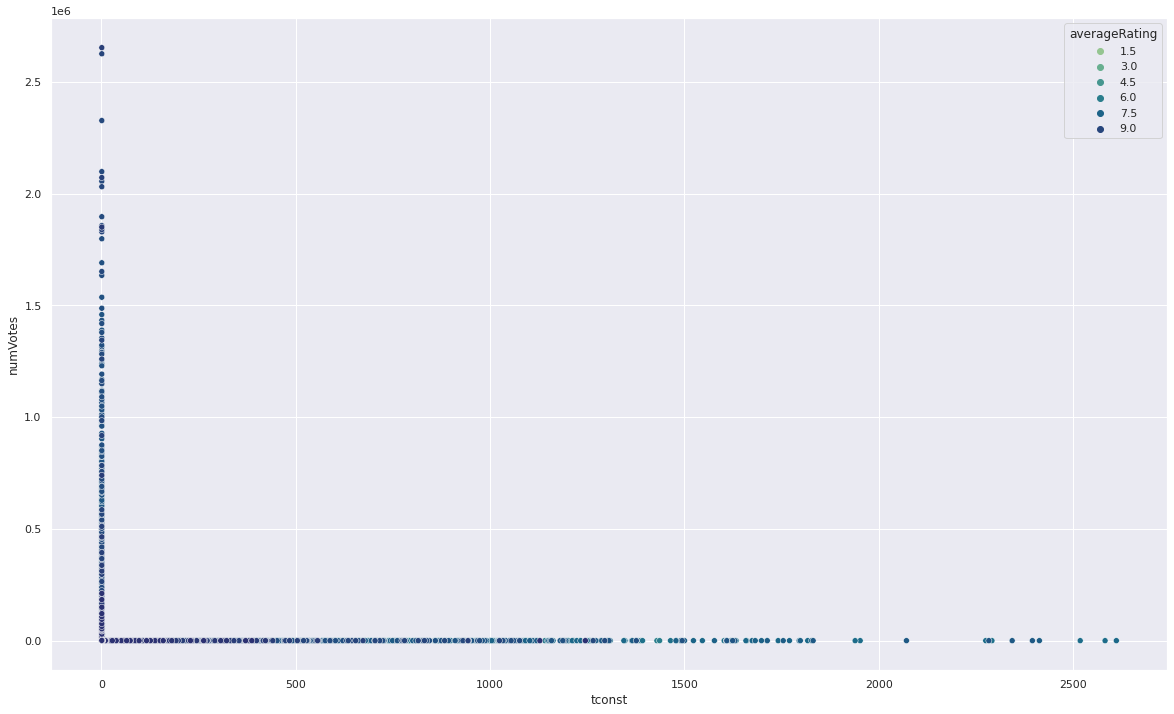

In [15]:
title_ratings_count = title_ratings.groupby(['averageRating','numVotes']).count().reset_index()
title_ratings_count

sns.set(rc={'figure.figsize':(20,12)})
sns.scatterplot(data = title_ratings_count, x= 'tconst', y = 'numVotes',  hue = 'averageRating', palette='crest')

Could we find a value above wish we can consider?

In [16]:
condition_br['numVotes'].quantile(.5)

#Answer: The value isnt meaningfull. There is great dispersion.

32.0

In [17]:
condition_br.describe()

,averageRating,numVotes
count,423731.000000,4.237310e+05
mean,6.402804,2.394202e+03
std,1.427587,2.824689e+04
min,1.000000,5.000000e+00
25%,5.500000,1.300000e+01
50%,6.500000,3.200000e+01
75%,7.300000,1.550000e+02
max,10.000000,2.653689e+06


KeyboardInterrupt: ignored

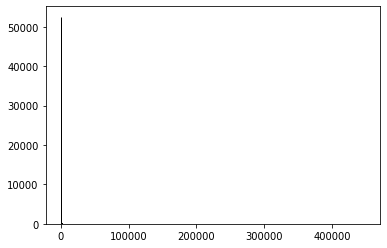

In [11]:
sns.histplot(data = condition_br['numVotes'])

In [ ]:
condition_br.info()

Conclusion: To choose a minimum number ofvotes to consider based on the median or other quantiles is not very logical.

Discussion on Weighted average: Could be a good indicator because it has in count both the ratings as the number of votes, but the values aren't meaningfull, that is, they don't show in a scale from 1to 10, that people relate to. When we try to scale it (using a 3 simple rule for the ['weighted'].max() as the 10), the shawshank redemption (top movie) is so far from the rest that the values still arent meaningfull. 

In [ ]:
#weighted average for scoring
condition_br['wheighted_avg'] = (condition_br['averageRating']*condition_br['numVotes'])/condition_br['numVotes'].sum()
condition_ = condition_br.sort_values(['wheighted_avg'], ascending = False).head(10)

In [ ]:
#does it represent the number of votes?
sns.scatterplot(data = condition_br, x = 'numVotes', y = 'wheighted_avg')

In [ ]:
#does it represent the average ratings?
sns.scatterplot(data = condition_br, x = 'averageRating', y = 'wheighted_avg')

In [ ]:
#3 simple rule for the weighted to be meaningfull
condition_br['wheighted_rule'] = (condition_br['wheighted']*10)/(condition_br['wheighted'].max())
condition_br['wheighted_rule'].value_counts()
# condition_test = condition_br.loc[condition_br['wheighted_rule'] == 10]
# condition_test

In [ ]:
#scoring bins
#using np
def score(x):
  if x in np.percentile(condition_br['wheighted'],10):
    return 1
  elif x in np.percentile(condition_br['wheighted'],20):
    return 2
  elif x in np.percentile(condition_br['wheighted'],30):
    return 3
  elif x in np.percentile(condition_br['wheighted'],40):
    return 4
  elif x in np.percentile(condition_br['wheighted'],50):
    return 5
  elif x in np.percentile(condition_br['wheighted'],60):
    return 6
  elif x in np.percentile(condition_br['wheighted'],70):
    return 7
  elif x in np.percentile(condition_br['wheighted'],80):
    return 8
  elif x in np.percentile(condition_br['wheighted'],90):
    return 9
  else:
    return 10

condition_br['wheighted'] = condition_br['wheighted'].apply(score)
condition_br

In [ ]:
#using pandas
def score(x):
  if x in condition_br.quantile(.10):
    return 1
  elif x in condition_br.quantile(.20):
    return 2
  elif x in condition_br.quantile(.30):
    return 3
  elif x in condition_br.quantile(.40):
    return 4
  elif x in condition_br.quantile(.50):
    return 5
  elif x in condition_br.quantile(.60):
    return 6
  elif x in condition_br.quantile(.70):
    return 7
  elif x in condition_br.quantile(.80):
    return 8
  elif x in condition_br.quantile(.09):
    return 9
  else:
    return 10

condition_br['wheighted_score'] = condition_br['wheighted'].apply(score)
condition_br

In [ ]:
condition_br['wheighted_score_test'] = pd.qcut(condition_br['wheighted'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
condition_br['wheighted_score_test2'] = pd.qcut(condition_br['wheighted'], q = 11, labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
condition_br['wheighted_score_test2'].fillna(0)

In [ ]:
type(condition_br['wheighted_score_test2'][0])

In [ ]:
condition_br['wheighted_score_test2'].value_counts()

In [ ]:
#trying to convert the discrete variable to continuous (didn't work)
#condition_br['wheighted_score_test2'].astype('int32').dtypes 
condition_br['wheighted_score_test2'].to_numpy()

Because we scored in bins and couldn't go back to make it a continuous variable scoring system, there was no difference between, we abandoned this hypothesis because all 9's or all 10's would be in the same group and we couldn't distinguish the top 3/5/10 movies from the others on the same category.

In [2]:
#try to multiply the weif«ghted by a factor to give a meaningfull value
condition_br['wheighted_rule_test'] = condition_br['wheighted']*100000
condition_br['wheighted_rule_test'].describe()

#Answer: this also didnt work, because the max weighted value is too far from all the other values, and we would end up with an average weighted across the df very low.

NameError: ignored


Conclusion: We decided to go another way, we searched and found the weighted average formula of IMDB wich was the one we decided for. Nevertheless, our top movies are a little diferente because, as was explained in IMDB, they also give more 'power' to the voters that vote more times and we dont have access to that information.

In [12]:
#Calculate the IMDB weighted average
C = condition_br['averageRating'].mean()

condition_br['wheighted_IMDB'] = ((condition_br['numVotes']/(condition_br['numVotes']+25000))*condition_br['averageRating']) + ((25000/(condition_br['numVotes']+25000))*C)
condition_br_movies = condition_br.sort_values(by='wheighted_IMDB', ascending = False).head(10)
condition_br_movies

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,wheighted_IMDB
108636,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2653689.0,9.272961
67247,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,1839485.0,9.162494
450059,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2626116.0,8.975508
161594,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",9.0,1829323.0,8.964985
105588,tt0108052,movie,Schindler's List,Schindler's List,0,1993,\N,195,"Biography,Drama,History",9.0,1344579.0,8.952591
70070,tt0071562,movie,The Godfather Part II,The Godfather Part II,0,1974,\N,202,"Crime,Drama",9.0,1260351.0,8.949485
49175,tt0050083,movie,12 Angry Men,12 Angry Men,0,1957,\N,96,"Crime,Drama",9.0,783550.0,8.919696
108389,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,2031277.0,8.869639
3028890,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2327397.0,8.774524
133558,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2098937.0,8.771784


In [ ]:
sns.boxplot(data = condition_br['wheighted_IMDB'])

#Year analysis and Top's

We decided to use the IMDB weighted average for the Top's




## 1) Year analysis

In [ ]:
condition_ms = condition_br.loc[((title_basics['titleType'] == 'movie') | (title_basics['titleType'] =='short')) & (title_basics['startYear'] <= '2022')]
#condition_ms
years_pivot = condition_ms.pivot_table(values = 'tconst', index = 'startYear', aggfunc = 'count')
years_pivot = years_pivot.rename(columns={'tconst' : 'n_entries'})
years_pivot

years_pivot.columns = ['n_titles']
years_pivot
# years_pivot_res = years_pivot.reset_index()
# years_pivot_res

#first movie/short = 1874 on IMDB (is a percussor, because public screening of ten of the Lumière brothers' short films in Paris on 28 December 1895 can be regarded as the breakthrough of projected cinematographic motion pictures.)

In [ ]:
check = years_pivot['n_titles'] == years_pivot['n_titles'].max()
years_pivot.loc[check]

In [ ]:
sns.set_style("white")

fig,ax = plt.subplots(figsize=(10,6))
fig.suptitle('Number of Movies & Shorts vs. time')

sns_years = sns.lineplot(data = years_pivot, x = years_pivot.index.values, y = 'n_titles')
plt.xticks(['1900', '1925', '1950', '1975', '2000', '2022'])

fig01 = sns_years.get_figure()
fig01.savefig("sns_years.png")

## 2) Top rated movies

In [9]:
title_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1920
1,tt0000002,5.8,260
2,tt0000003,6.5,1728
3,tt0000004,5.6,173
4,tt0000005,6.2,2541
...,...,...,...
1241069,tt9916690,7.4,6
1241070,tt9916720,5.3,270
1241071,tt9916730,9.0,6
1241072,tt9916766,6.7,21


In [13]:
condition_ms = condition_br.loc[((title_basics['titleType'] == 'movie') | (title_basics['titleType'] =='short')) & (title_basics['startYear'] <= '2022')]
condition_ms

condition_ms.pivot_table(values = 'wheighted_IMDB', index = 'startYear', aggfunc = 'mean').sort_values(by = 'wheighted_IMDB', ascending = False).head()

,wheighted_IMDB
startYear,
1878,6.456070
1874,6.434495
1888,6.431091
1962,6.418250
1948,6.418228


In [14]:
C = condition_br['averageRating'].mean()

condition_br['wheighted_IMDB'] = ((condition_br['numVotes']/(condition_br['numVotes']+25000))*condition_br['averageRating']) + ((25000/(condition_br['numVotes']+25000))*C)
condition_br_movies = condition_br.sort_values(by='wheighted_IMDB', ascending = False).head(10)
condition_br_movies

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,wheighted_IMDB
108636,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2653689.0,9.272961
67247,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,1839485.0,9.162494
450059,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2626116.0,8.975508
161594,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",9.0,1829323.0,8.964985
105588,tt0108052,movie,Schindler's List,Schindler's List,0,1993,\N,195,"Biography,Drama,History",9.0,1344579.0,8.952591
70070,tt0071562,movie,The Godfather Part II,The Godfather Part II,0,1974,\N,202,"Crime,Drama",9.0,1260351.0,8.949485
49175,tt0050083,movie,12 Angry Men,12 Angry Men,0,1957,\N,96,"Crime,Drama",9.0,783550.0,8.919696
108389,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,2031277.0,8.869639
3028890,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2327397.0,8.774524
133558,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2098937.0,8.771784


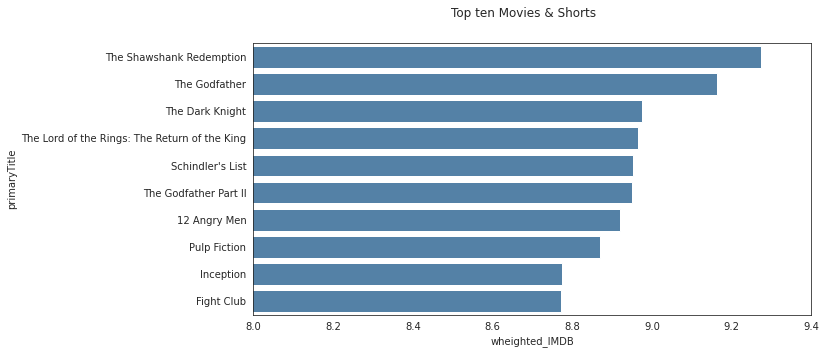

In [22]:
sns.set_style("white")

fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle('Top ten Movies & Shorts')

# pal = sns.color_palette("Blues")
sns_titles = sns.barplot(data = condition_br_movies, x = 'wheighted_IMDB', y = 'primaryTitle', color = 'steelblue', orient = 'h')
sns_titles.set_xlim(8, 9.4)

fig03 = sns_titles.get_figure()
fig03.savefig("sns_titles.png", bbox_inches = "tight")

# 3) Top rated genres

In [ ]:
Title_basics_ratings = pd.merge(title_basics, title_ratings, how='outer', on=['tconst', 'tconst'])
condition_br = Title_basics_ratings.loc[((Title_basics_ratings['titleType'] == 'movie') | (Title_basics_ratings['titleType'] =='short')) & (Title_basics_ratings['startYear'] <= '2022')]
# condition_br['wheighted'] = (condition_br['averageRating']*condition_br['numVotes'])/(condition_br['numVotes'].sum())

KeyboardInterrupt: ignored

In [ ]:
condition_br['wheighted'] = (condition_br['averageRating']*condition_br['numVotes'])/(condition_br['numVotes'].sum())
condition_br.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,averageRating,numVotes,wheighted
count,423731.000000,4.237310e+05,4.237310e+05
mean,6.402804,2.394202e+03,1.657879e-05
std,1.427587,2.824689e+04,2.200590e-04
min,1.000000,5.000000e+00,4.928548e-09
25%,5.500000,1.300000e+01,8.201104e-08
50%,6.500000,3.200000e+01,2.020705e-07
75%,7.300000,1.550000e+02,8.728458e-07
max,10.000000,2.653689e+06,2.432663e-02


In [ ]:
#With IMDB formula
C = condition_br['averageRating'].mean()

condition_br['wheighted_IMDB'] = ((condition_br['numVotes']/(condition_br['numVotes']+25000))*condition_br['averageRating']) + ((25000/(condition_br['numVotes']+25000))*C)
condition_br['wheighted_IMDB'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


count    423731.000000
mean          6.404605
std           0.108521
min           2.196627
25%           6.401363
50%           6.402854
75%           6.403770
max           9.272961
Name: wheighted_IMDB, dtype: float64

In [ ]:
condition_br["genres"] = condition_br.genres.str.split(',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
conditon_br_split = condition_br.explode("genres")
conditon_br_split

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,wheighted,wheighted_IMDB
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,Documentary,5.7,1920.0,1.078761e-05,6.352678
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,Short,5.7,1920.0,1.078761e-05,6.352678
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,Animation,5.8,260.0,1.486450e-06,6.396599
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,Short,5.8,260.0,1.486450e-06,6.396599
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,Animation,6.5,1728.0,1.107149e-05,6.409088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324254,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N,9.0,6.0,5.322832e-08,6.403427
9324264,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,\N,49,Documentary,NaN,NaN,NaN,NaN
9324265,tt9916756,short,Pretty Pretty Black Girl,Pretty Pretty Black Girl,0,2019,\N,\N,Short,NaN,NaN,NaN,NaN
9324269,tt9916764,short,38,38,0,2018,\N,\N,Short,NaN,NaN,NaN,NaN


In [ ]:
genres_group = conditon_br_split.groupby(['genres']).agg({'wheighted': 'mean', 'averageRating': 'mean', 'tconst' : 'count', 'wheighted_IMDB' : 'mean'}).reset_index()
genres_group_loc = genres_group.sort_values(['wheighted_IMDB'], ascending = False).head(10)
genres_group_loc.columns = ['genres', 'weighted_avg', 'averageRating', 'n_titles', 'wheighted_IMDB']
genres_group_loc.sort_values(by='wheighted_IMDB', ascending = False)

,genres,weighted_avg,averageRating,n_titles,wheighted_IMDB
11,Film-Noir,0.000033,6.499764,849,6.473521
4,Biography,0.000047,7.026839,26467,6.444148
13,History,0.000022,6.906473,21212,6.426181
26,War,0.000024,6.479625,11881,6.424873
23,Sport,0.000026,6.599034,11837,6.416219
15,Music,0.000016,6.760729,33610,6.414760
6,Crime,0.000049,6.157000,50847,6.414287
8,Drama,0.000021,6.484428,447479,6.413866
3,Animation,0.000018,6.485167,62122,6.413332
18,News,0.000002,6.794779,7080,6.409429


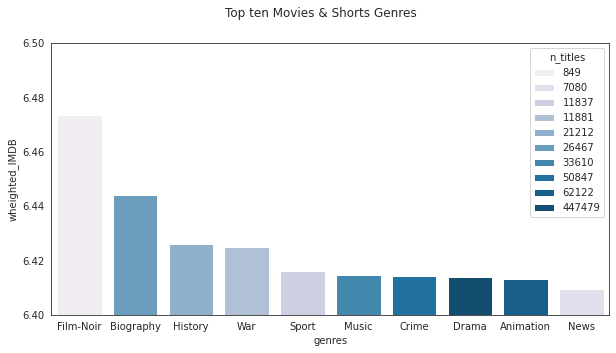

In [ ]:
sns.set_style("white")

fig, ax = plt.subplots(figsize = (10,5))
fig.suptitle('Top ten Movies & Shorts Genres')

pal = sns.color_palette("Blues", len(genres_group_loc['n_titles']))
sns_genres = sns.barplot(data = genres_group_loc, x = 'genres', y = 'wheighted_IMDB', hue = 'n_titles', palette = 'PuBu', dodge=False)
sns_genres.set_ylim(6.4, 6.5)

fig02 = sns_genres.get_figure()
fig02.savefig("sns_genres.png")


In [ ]:
#Another way to vary the color by the values:

# fig, ax = plt.subplots(figsize = (10,5))
# fig.suptitle('Top ten Movies & Shorts Genres')

# pal = sns.color_palette("Blues", len(genres_group_loc['n_titles']))
# sns.barplot(data = genres_group_loc, x = 'genres', y = 'weighted_avg', hue = 'n_titles', palette = np.array(pal[::1]), dodge=False)

In [ ]:
#TOP specific genre movie
condition_drama = conditon_br_split.loc[conditon_br_split['genres'] == 'Biography']
condition_drama.sort_values(by = 'wheighted_IMDB', ascending = False)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,wheighted_IMDB,wheighted
105588,tt0108052,movie,Schindler's List,Schindler's List,0,1993,\N,195,Biography,9.0,1344579.0,8.952591,0.011928
97438,tt0099685,movie,Goodfellas,Goodfellas,0,1990,\N,145,Biography,8.7,1149841.0,8.651117,0.009861
4506467,tt1675434,movie,The Intouchables,Intouchables,0,2011,\N,112,Biography,8.5,850812.0,8.440136,0.007129
242706,tt0253474,movie,The Pianist,The Pianist,0,2002,\N,150,Biography,8.5,824892.0,8.438310,0.006911
110005,tt0112573,movie,Braveheart,Braveheart,0,1995,\N,178,Biography,8.4,1032824.0,8.352799,0.008552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313872,tt9894432,short,I come isgrò,I come isgrò,0,2016,\N,\N,Biography,NaN,NaN,NaN,NaN
9314768,tt9896260,short,I come Isgrò,I come Isgrò,0,2015,\N,\N,Biography,NaN,NaN,NaN,NaN
9315592,tt9898024,short,Mimos,Mimos,0,2015,\N,\N,Biography,NaN,NaN,NaN,NaN
9317813,tt9902832,movie,Lila Kourkoulakou,Lila Kourkoulakou,0,2017,\N,60,Biography,NaN,NaN,NaN,NaN


# General data

In [7]:
#Checking values in the Title_basics_ratings table
test = Title_basics_ratings.loc[Title_basics_ratings['originalTitle'] == 'The Shawshank Redemption']
test

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
108636,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2653689.0
2151524,tt12126304,tvEpisode,The Shawshank Redemption,The Shawshank Redemption,0,2019,\N,\N,Talk-Show,NaN,NaN
2238109,tt12286264,tvEpisode,The Shawshank Redemption,The Shawshank Redemption,0,2020,\N,\N,Talk-Show,NaN,NaN
3043564,tt13783684,tvEpisode,The Shawshank Redemption,The Shawshank Redemption,0,2021,\N,\N,Comedy,6.7,37.0
3332971,tt14308968,tvEpisode,The Shawshank Redemption,The Shawshank Redemption,0,2011,\N,\N,"Game-Show,Reality-TV",NaN,NaN
5507252,tt21385878,tvEpisode,The Shawshank Redemption,The Shawshank Redemption,0,2022,\N,\N,Comedy,NaN,NaN
5639439,tt21915388,tvEpisode,The Shawshank Redemption,The Shawshank Redemption,0,2022,\N,\N,Comedy,NaN,NaN
7842949,tt6681006,tvEpisode,The Shawshank Redemption,The Shawshank Redemption,0,2015,\N,7,Comedy,NaN,NaN
8124346,tt7308124,tvEpisode,The Shawshank Redemption,The Shawshank Redemption,0,2017,\N,\N,"Comedy,Talk-Show",8.1,19.0


In [8]:
#Checking possibilities: Best 10 Documentaries using string contains
condition_br = condition_br[condition_br['genres'].str.contains('Documentary')]
condition_br.sort_values(['score'], ascending = False).head(10)

NameError: ignored

In [ ]:
# Trying to do a pieplot
size_of_groups=[868113,538414, ]
names = ['short', 'movie']

# Create a pieplot
plt.pie(size_of_groups)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size_of_groups, labels=names, colors=['steelblue','skyblue'])
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()